In [6]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv("../Processed Data/Clustersnovalue.csv")
df = df.set_index('Ticker')

In [8]:
df

,Last Sale,Net Change,% Change,Market Cap,Volume,52 wk high,52 wk low,beta,P/E,Avg Volume,cluster
Ticker,,,,,,,,,,,
ABM,-0.161185,-0.648899,-0.886432,-0.445623,-0.482800,-0.172042,-0.160216,0.289285,9.186227,-0.458773,3
AC,-0.223124,-0.686877,-1.123155,-0.534259,-0.545003,-0.172212,-0.090006,0.244779,-0.078340,-0.665305,1
AEB,-0.334900,0.139143,0.428004,-0.569115,-0.553505,-0.340090,-0.292338,1.446424,-0.105598,-0.661844,1
AEG,-0.524691,0.039451,0.421774,-0.148085,1.096155,-0.514080,-0.447278,0.422801,-0.105598,1.109245,2
AEL,-0.303788,0.158132,0.434233,-0.454222,-0.370292,-0.265317,-0.331272,0.022253,-0.103053,-0.142210,1
...,...,...,...,...,...,...,...,...,...,...,...
WF,-0.324214,0.395495,1.075877,-0.302233,-0.553056,-0.314119,-0.228032,-1.379666,-0.102163,-0.659036,5
WHG,-0.404878,0.025210,0.141444,-0.562903,-0.544690,-0.327699,-0.325688,0.712086,-0.105598,-0.644119,1
WRB,0.100192,0.808505,0.845384,-0.034337,-0.168114,0.057199,0.210940,-0.912360,-0.090111,-0.088167,5


In [9]:
np.random.seed(0)

# The target variable is 'cluster'.
Y = df['cluster']
X = df.drop(['cluster'], axis=1)
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [10]:
Y

Ticker
ABM    3
AC     1
AEB    1
AEG    2
AEL    1
      ..
WF     5
WHG    1
WRB    5
Y      6
YRD    1
Name: cluster, Length: 224, dtype: int64

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train);

from sklearn.metrics import confusion_matrix

test_pred = rf.predict(X_test)
confusion_matrix(test_pred, Y_test)

array([[ 3,  0,  0,  0],
       [ 0, 21,  0,  1],
       [ 0,  0,  3,  0],
       [ 2,  0,  0, 15]], dtype=int64)

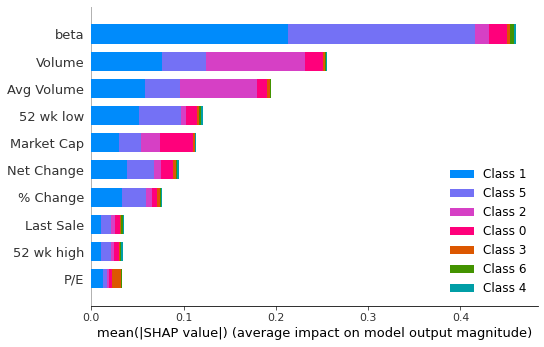

In [12]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

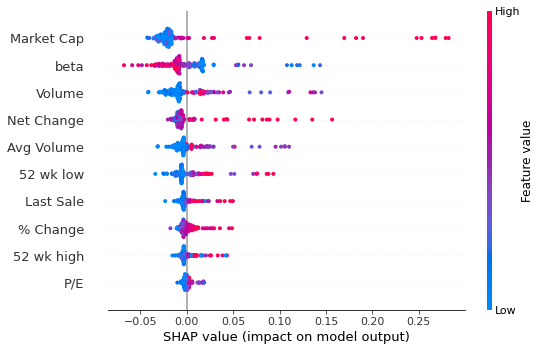

In [13]:
shap.summary_plot(shap_values[0], X_train)

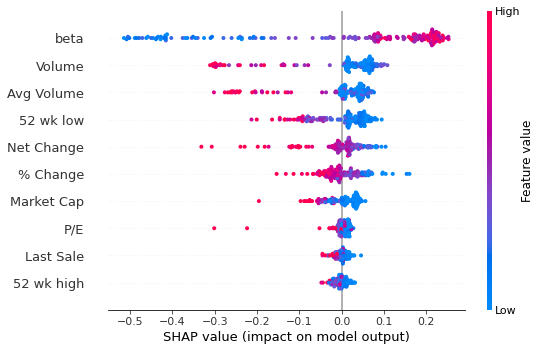

In [14]:
shap.summary_plot(shap_values[1], X_train)

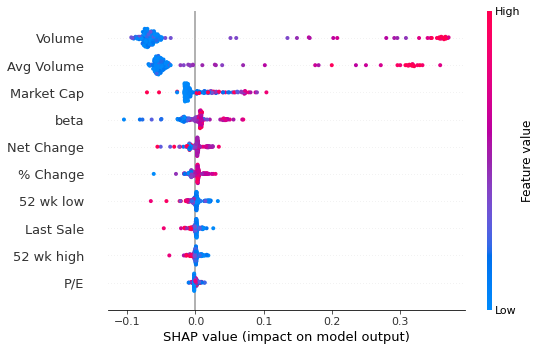

In [15]:
shap.summary_plot(shap_values[2], X_train)

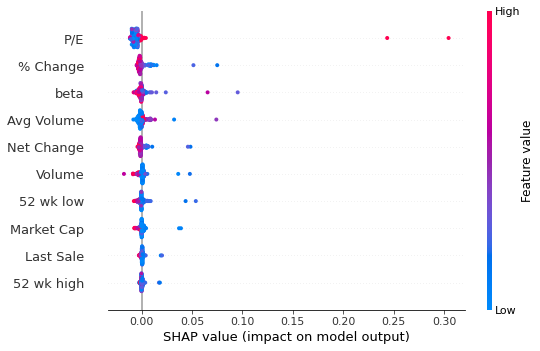

In [16]:
shap.summary_plot(shap_values[3], X_train)

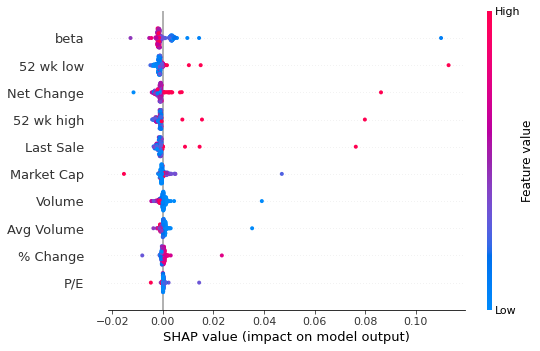

In [17]:
shap.summary_plot(shap_values[4], X_train)

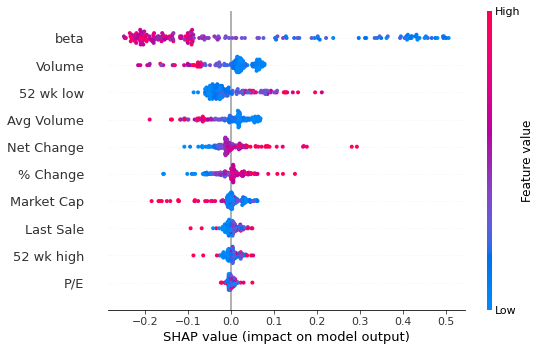

In [18]:
shap.summary_plot(shap_values[5], X_train)

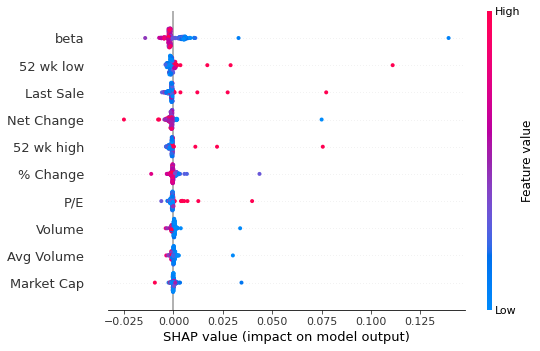

In [19]:
shap.summary_plot(shap_values[6], X_train)